This one is going for $k=36$.

In [1]:
from RRR import *
from rankProject import *
from cliqueProject import *

n = 5

H = np.array(
    [[0, 1, 1, 1, 1],
    [1, 0, 1, 0, 0],
    [1, 1, 0, 0, 0],
    [1, 0, 0, 0, 0],
    [1, 0, 0, 0, 0]])

A = semiDefProject(np.random.rand(n, n))

print A

[[ 0.89689362  0.65275567  0.20386811  0.23239795  0.47663747]
 [ 0.65275567  0.41932745  0.35422516  0.43831328  0.61255364]
 [ 0.20386811  0.35422516  0.49815384  0.43824569  0.76018794]
 [ 0.23239795  0.43831328  0.43824569  0.48549436  0.77710255]
 [ 0.47663747  0.61255364  0.76018794  0.77710255  0.72948761]]


In [2]:
n = 125
from graphReader import getGraph
H = getGraph()

In [3]:
def verifyClique(c, H):
    r = 1
    for i in range(len(c)):
        for j in range(i+ 1, len(c)):
            r = r*H[c[i], c[j]]
    return r

In [4]:
k = 36

A = semiDefProject(np.random.rand(n, n))

Y, errors, sols = RRR(A, 
                    lambda x: cliqueProject(x, k, H), 
                    lambda x: rankProject(x, 1, False),
                    0.5, 1e-12, 10, True)

In [9]:
while(True):
    Y, errors2, sols = RRR(Y,
                    lambda x: cliqueProject(x, k, H), 
                    lambda x: rankProject(x, 1, False),
                    0.5, 1e-12, 1000, True)
    errors += errors2
    if errors[-1] < 1e-4:
        break



KeyboardInterrupt: 

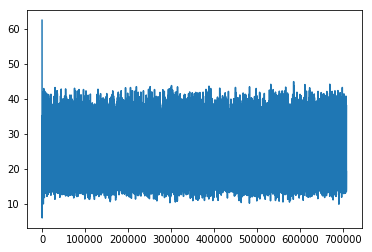

In [8]:
plt.plot(errors)
plt.show()

It's worth noting that the error trace for $k=36$ and $k=35$ look very different.

$k=35$ stays quite close to $0$, while $k=36$ seems bounded away from it. Perhaps there is no solution at $k=36$? Or just, most sets are far from being cliques?